# Import Libraries

In [0]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# Import Data

In [3]:
import h5py
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/A_Q3/SVHN_grey.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (63733, 32, 32, 1) (63733, 10)
Validation set (9524, 32, 32, 1) (9524, 10)
Test set (26032, 32, 32, 1) (26032, 10)


Plot Images

In [0]:
def plot_images(images, nrows, ncols, cls_true, cls_pred=None):
    """ Helper function for plotting nrows * ncols images
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 2*nrows))
    for i, ax in enumerate(axes.flat): 
        # Pretty string with actual label
        true_number = ''.join(str(x) for x in cls_true[i] if x != 10)
        if cls_pred is None:
            title = "Label: {0}".format(true_number)
        else:
            # Pretty string with predicted label
            pred_number = ''.join(str(x) for x in cls_pred[i] if x != 10)
            title = "Label: {0}, Pred: {1}".format(true_number, pred_number)  
            
        if images[i].shape == (32, 32, 3):
            print(1)
            ax.imshow(images[i])
        else:
            ax.imshow(images[:,:,:,i], cmap="gray")
#             ax.imshow(images[i])
        ax.set_title(title)   
        ax.set_xticks([]); ax.set_yticks([])

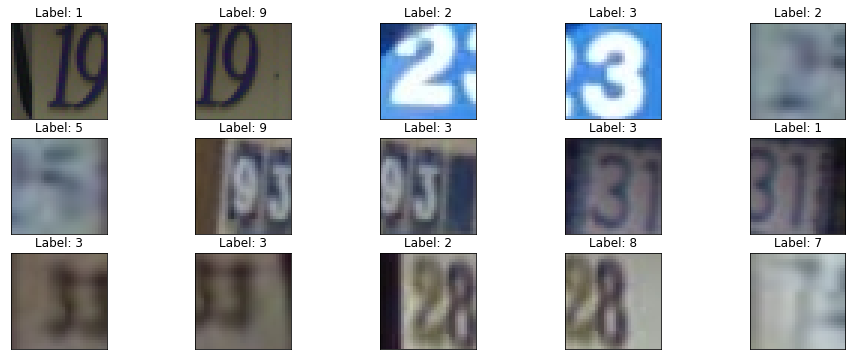

In [0]:
# Display images from the training set
plot_images(train_data, 3, 5, train_labels)

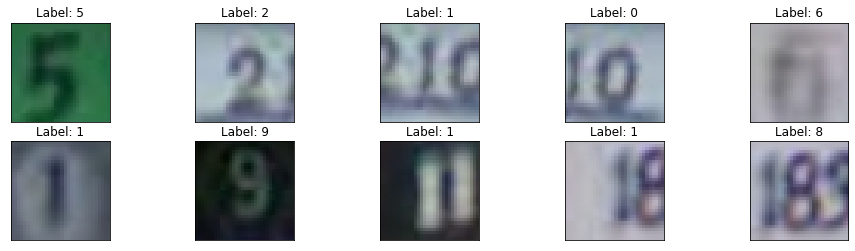

In [0]:
# Display images from the training set
plot_images(test_data, 2, 5, test_labels)

In [0]:
input_shape = (32,32,1)
nClasses = 10

# Create Model

In [0]:
def createSubModel(n=1, dropout_= True, drop=0.25):
  model = Sequential()

  if n==1:
    # The first two layers with 32 filters of window size 5x5
    model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if dropout_ == True:
      model.add(Dropout(drop))

  # The Second two layers with 32, 64 filters of window size 5x5
  if n==2:
    model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if dropout_ == True:
      model.add(Dropout(drop))

    model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if dropout_ == True:
      model.add(Dropout(drop))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nClasses, activation='softmax'))
    
  return model

In [0]:
subModel1 = createSubModel(1, dropout_= False)
subModel2 = createSubModel(1, dropout_= True)
subModel3 = createSubModel(2, dropout_= False)
subModel4 = createSubModel(2, dropout_= True)
subModel5 = createSubModel(2, dropout_= True, drop=0.5)
subModel6 = createSubModel(2, dropout_= True, drop=0.75)

In [7]:
batch_size = 1024
epochs = 100
subModel1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel6.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

print("Summary of SubModel1:")
subModel1.summary()
print("Summary of SubModel2:")
subModel2.summary()
print("Summary of SubModel3:")
subModel3.summary()
print("Summary of SubModel4:")
subModel4.summary()
print("Summary of SubModel5:")
subModel5.summary()
print("Summary of SubModel6:")
subModel6.summary()

Summary of SubModel1:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3211776   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None

In [0]:
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [9]:
history1 = subModel1.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel1.evaluate(X_test, y_test)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
63/63 [==============================] - 16s 252ms/step - loss: 2.2680 - accuracy: 0.2394 - val_loss: 1.3956 - val_accuracy: 0.5576
Epoch 2/100
63/63 [==============================] - 16s 254ms/step - loss: 1.5086 - accuracy: 0.5130 - val_loss: 0.8823 - val_accuracy: 0.7487
Epoch 3/100
63/63 [==============================] - 16s 248ms/step - loss: 1.1846 - accuracy: 0.6231 - val_loss: 0.7502 - val_accuracy: 0.7817
Epoch 4/100
63/63 [==============================] - 16s 252ms/step - loss: 1.0175 - accuracy: 0.6769 - val_loss: 0.5929 - val_accuracy: 0.8258
Epoch 5/100
63/63 [==============================] - 16s 252ms/step - loss: 0.8981 - accuracy: 0.7169 - val_loss: 0.6003 - val_accuracy: 0.8188
Epoch 6/100
63/63 [==============================] - 16s 252ms/step - loss: 0.8331 - accuracy: 0.7378 - val_loss: 0.5083 - val_accuracy: 0.8498
Epoch 7/100
63/63 [==============================] - 16s 249

[0.2929806411266327, 0.9233251214027405]

In [0]:
subModel1.save('/content/drive/My Drive/Colab Notebooks/A_Q3/Models/Model_5/subModel1.h5')

In [11]:
history2 = subModel2.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel2.evaluate(X_test, y_test)

Epoch 1/100
63/63 [==============================] - 16s 253ms/step - loss: 2.1638 - accuracy: 0.2465 - val_loss: 1.4635 - val_accuracy: 0.5254
Epoch 2/100
63/63 [==============================] - 16s 251ms/step - loss: 1.5136 - accuracy: 0.5089 - val_loss: 0.9339 - val_accuracy: 0.7376
Epoch 3/100
63/63 [==============================] - 16s 253ms/step - loss: 1.2187 - accuracy: 0.6113 - val_loss: 0.6931 - val_accuracy: 0.8011
Epoch 4/100
63/63 [==============================] - 16s 252ms/step - loss: 1.0436 - accuracy: 0.6686 - val_loss: 0.5952 - val_accuracy: 0.8205
Epoch 5/100
63/63 [==============================] - 16s 252ms/step - loss: 0.9375 - accuracy: 0.7035 - val_loss: 0.5429 - val_accuracy: 0.8424
Epoch 6/100
63/63 [==============================] - 16s 252ms/step - loss: 0.8515 - accuracy: 0.7308 - val_loss: 0.5129 - val_accuracy: 0.8543
Epoch 7/100
63/63 [==============================] - 16s 249ms/step - loss: 0.7957 - accuracy: 0.7479 - val_loss: 0.4801 - val_accuracy:

[0.2941977083683014, 0.9247848987579346]

In [0]:
subModel2.save('/content/drive/My Drive/Colab Notebooks/A_Q3/Models/Model_5/subModel2.h5')

# Comparison of Model Accuracy without and with Dropout

Text(0.5, 1.0, 'Accuracy Curves')

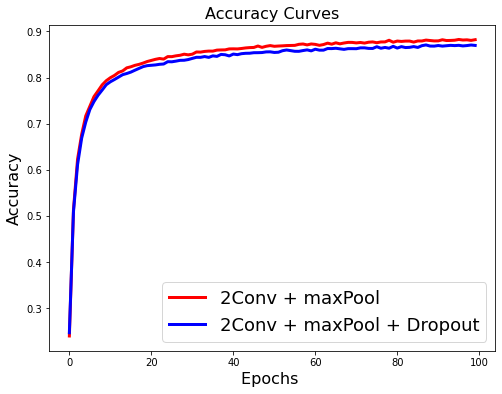

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['accuracy'],'b',linewidth=3.0)
plt.legend(['2Conv + maxPool', '2Conv + maxPool + Dropout'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

The Accuracy of Model decreased when used Dropout Operation

Text(0.5, 1.0, 'Loss Curves')

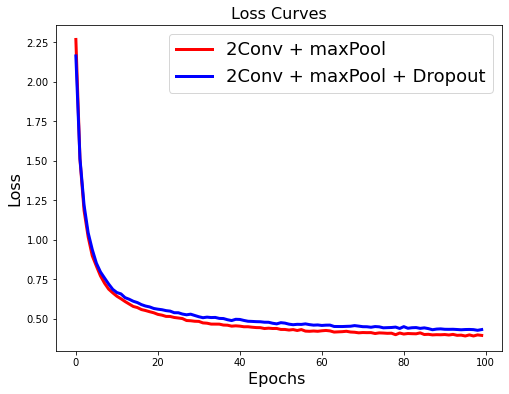

In [14]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['loss'],'b',linewidth=3.0)
plt.legend(['2Conv + maxPool', '2Conv + maxPool + Dropout'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [15]:
history3 = subModel3.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel3.evaluate(X_test, y_test)

Epoch 1/100
63/63 [==============================] - 17s 277ms/step - loss: 2.2006 - accuracy: 0.2205 - val_loss: 1.6834 - val_accuracy: 0.5057
Epoch 2/100
63/63 [==============================] - 17s 271ms/step - loss: 1.5775 - accuracy: 0.4708 - val_loss: 0.7604 - val_accuracy: 0.7714
Epoch 3/100
63/63 [==============================] - 17s 270ms/step - loss: 1.0867 - accuracy: 0.6486 - val_loss: 0.6323 - val_accuracy: 0.8092
Epoch 4/100
63/63 [==============================] - 17s 270ms/step - loss: 0.8546 - accuracy: 0.7277 - val_loss: 0.4414 - val_accuracy: 0.8688
Epoch 5/100
63/63 [==============================] - 17s 267ms/step - loss: 0.6952 - accuracy: 0.7834 - val_loss: 0.6462 - val_accuracy: 0.7877
Epoch 6/100
63/63 [==============================] - 17s 271ms/step - loss: 0.6011 - accuracy: 0.8140 - val_loss: 0.3732 - val_accuracy: 0.8866
Epoch 7/100
63/63 [==============================] - 17s 271ms/step - loss: 0.5467 - accuracy: 0.8331 - val_loss: 0.4586 - val_accuracy:

[0.23276576399803162, 0.9444145560264587]

In [0]:
subModel3.save('/content/drive/My Drive/Colab Notebooks/A_Q3/Models/Model_5/subModel3.h5')

In [17]:
history4 = subModel4.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel4.evaluate(X_test, y_test)

Epoch 1/100
63/63 [==============================] - 17s 276ms/step - loss: 2.1922 - accuracy: 0.2272 - val_loss: 1.4414 - val_accuracy: 0.5275
Epoch 2/100
63/63 [==============================] - 17s 270ms/step - loss: 1.5835 - accuracy: 0.4725 - val_loss: 1.0125 - val_accuracy: 0.7167
Epoch 3/100
63/63 [==============================] - 17s 273ms/step - loss: 1.1252 - accuracy: 0.6372 - val_loss: 0.6420 - val_accuracy: 0.8274
Epoch 4/100
63/63 [==============================] - 17s 271ms/step - loss: 0.9006 - accuracy: 0.7128 - val_loss: 0.5281 - val_accuracy: 0.8396
Epoch 5/100
63/63 [==============================] - 17s 273ms/step - loss: 0.7547 - accuracy: 0.7616 - val_loss: 0.5714 - val_accuracy: 0.8214
Epoch 6/100
63/63 [==============================] - 17s 273ms/step - loss: 0.6760 - accuracy: 0.7878 - val_loss: 0.5021 - val_accuracy: 0.8515
Epoch 7/100
63/63 [==============================] - 17s 273ms/step - loss: 0.6141 - accuracy: 0.8077 - val_loss: 0.4491 - val_accuracy:

[0.2619829475879669, 0.9356561303138733]

In [0]:
subModel4.save('/content/drive/My Drive/Colab Notebooks/A_Q3/Models/Model_5/subModel4.h5')

Text(0.5, 1.0, 'Accuracy Curves')

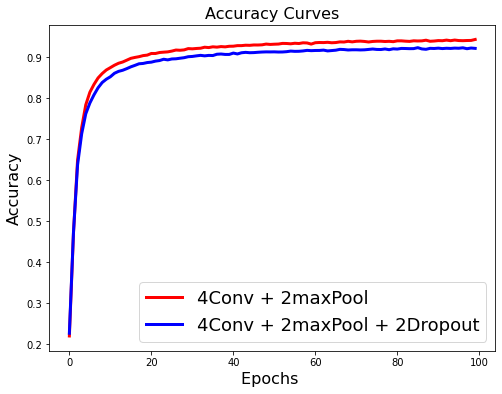

In [19]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['accuracy'],'r',linewidth=3.0)
plt.plot(history4.history['accuracy'],'b',linewidth=3.0)
plt.legend(['4Conv + 2maxPool', '4Conv + 2maxPool + 2Dropout'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

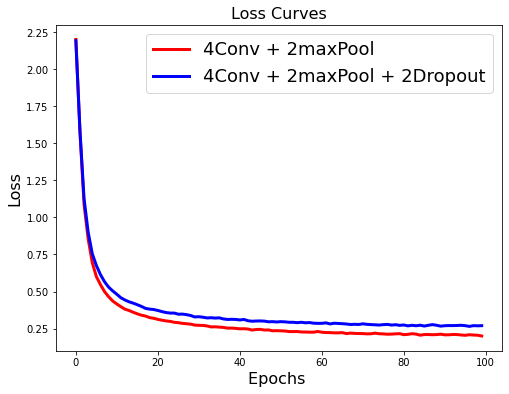

In [20]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['loss'],'r',linewidth=3.0)
plt.plot(history4.history['loss'],'b',linewidth=3.0)
plt.legend(['4Conv + 2maxPool', '4Conv + 2maxPool + 2Dropout'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Copmparison of Model Accuracy with increasing number of layers

Text(0.5, 1.0, 'Accuracy Curves')

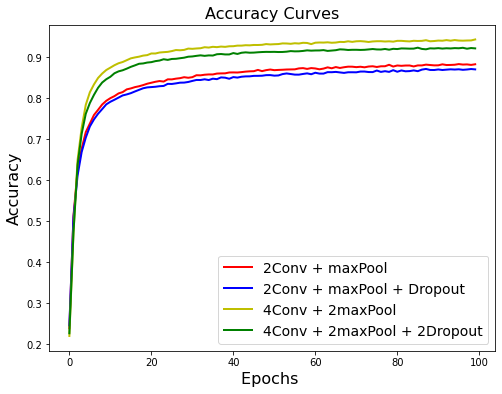

In [21]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['accuracy'],'b',linewidth=2.0)
plt.plot(history3.history['accuracy'],'y',linewidth=2.0)
plt.plot(history4.history['accuracy'],'g',linewidth=2.0)
plt.legend(['2Conv + maxPool', '2Conv + maxPool + Dropout','4Conv + 2maxPool', '4Conv + 2maxPool + 2Dropout'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

The Accuracy of Model increased when used higher number of Layers.

# Effect of increasing rate of dropout on Accuracy

In [22]:
history5 = subModel5.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel5.evaluate(X_test, y_test)

Epoch 1/100
63/63 [==============================] - 17s 275ms/step - loss: 2.2710 - accuracy: 0.1801 - val_loss: 2.1133 - val_accuracy: 0.2877
Epoch 2/100
63/63 [==============================] - 17s 272ms/step - loss: 1.8109 - accuracy: 0.3825 - val_loss: 0.8883 - val_accuracy: 0.7269
Epoch 3/100
63/63 [==============================] - 17s 272ms/step - loss: 1.2783 - accuracy: 0.5813 - val_loss: 0.6219 - val_accuracy: 0.8091
Epoch 4/100
63/63 [==============================] - 17s 272ms/step - loss: 1.0288 - accuracy: 0.6697 - val_loss: 0.5883 - val_accuracy: 0.8450
Epoch 5/100
63/63 [==============================] - 17s 273ms/step - loss: 0.8706 - accuracy: 0.7223 - val_loss: 0.4174 - val_accuracy: 0.8827
Epoch 6/100
63/63 [==============================] - 17s 278ms/step - loss: 0.7836 - accuracy: 0.7519 - val_loss: 0.4802 - val_accuracy: 0.8557
Epoch 7/100
63/63 [==============================] - 17s 274ms/step - loss: 0.7171 - accuracy: 0.7736 - val_loss: 0.3689 - val_accuracy:

[0.2411717027425766, 0.9359250068664551]

In [0]:
subModel5.save('/content/drive/My Drive/Colab Notebooks/A_Q3/Models/Model_5/subModel5.h5')

In [24]:
history6 = subModel6.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel6.evaluate(X_test, y_test)

Epoch 1/100
63/63 [==============================] - 17s 274ms/step - loss: 2.2500 - accuracy: 0.1839 - val_loss: 2.1041 - val_accuracy: 0.2044
Epoch 2/100
63/63 [==============================] - 17s 272ms/step - loss: 1.9977 - accuracy: 0.2985 - val_loss: 1.2001 - val_accuracy: 0.6425
Epoch 3/100
63/63 [==============================] - 17s 272ms/step - loss: 1.5769 - accuracy: 0.4678 - val_loss: 0.9864 - val_accuracy: 0.7493
Epoch 4/100
63/63 [==============================] - 17s 274ms/step - loss: 1.3323 - accuracy: 0.5551 - val_loss: 0.6717 - val_accuracy: 0.8002
Epoch 5/100
63/63 [==============================] - 17s 274ms/step - loss: 1.1945 - accuracy: 0.6080 - val_loss: 0.6555 - val_accuracy: 0.8096
Epoch 6/100
63/63 [==============================] - 17s 274ms/step - loss: 1.0844 - accuracy: 0.6446 - val_loss: 0.5185 - val_accuracy: 0.8565
Epoch 7/100
63/63 [==============================] - 18s 278ms/step - loss: 1.0065 - accuracy: 0.6727 - val_loss: 0.5187 - val_accuracy:

[0.30377909541130066, 0.9108405113220215]

In [0]:
subModel6.save('/content/drive/My Drive/Colab Notebooks/A_Q3/Models/Model_5/subModel6.h5')

Text(0.5, 1.0, 'Accuracy Curves')

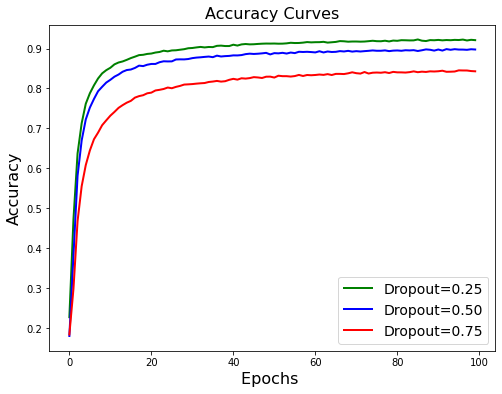

In [26]:
plt.figure(figsize=[8,6])
plt.plot(history4.history['accuracy'],'g',linewidth=2.0)
plt.plot(history5.history['accuracy'],'b',linewidth=2.0)
plt.plot(history6.history['accuracy'],'r',linewidth=2.0)
plt.legend(['Dropout=0.25', 'Dropout=0.50','Dropout=0.75'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Main Model

-*# of Conv2D layers* ---> 6              
-*# of MaxPooling2D*  ---> 3     
-*# of Dropouts*      ---> 3(25%)+1(50%)  
-*filter size*        ---> (5,5)   
-*Acrivation*         ---> 'relu'   
-*total Parameters*   ---> 915,050

In [0]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [0]:
model2 = createModel()
batch_size = 1024
epochs = 100
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)         

In [0]:
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Train

*Maximum Accuracy* ---->      93.34%    
*Maximum Validation Acc* ---> 94.82%    
*Test Accuracy* ---->         94.82% 

In [0]:
history = model2.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
# history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
#                    validation_data=(test_data, test_labels_one_hot))
model2.evaluate(X_test, y_test)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
63/63 [==============================] - 31s 499ms/step - loss: 2.8392 - accuracy: 0.1790 - val_loss: 2.2030 - val_accuracy: 0.1959
Epoch 2/100
63/63 [==============================] - 31s 490ms/step - loss: 2.2162 - accuracy: 0.1949 - val_loss: 1.9384 - val_accuracy: 0.3291
Epoch 3/100
63/63 [==============================] - 31s 498ms/step - loss: 1.7224 - accuracy: 0.4058 - val_loss: 1.0082 - val_accuracy: 0.6841
Epoch 4/100
63/63 [==============================] - 31s 496ms/step - loss: 1.1443 - accuracy: 0.6253 - val_loss: 0.6145 - val_accuracy: 0.8165
Epoch 5/100
63/63 [==============================] - 31s 490ms/step - loss: 0.8558 - accuracy: 0.7279 - val_loss: 0.5003 - val_accuracy: 0.8519
Epoch 6/100
63/63 [==============================] - 31s 490ms/step - loss: 0.6975 - accuracy: 0.7832 - val_loss: 0.4017 - val_accuracy: 0.8790
Epoch 7/100
63/63 [==============================] - 31s 492

[0.19078253209590912, 0.9482175707817078]

In [0]:
y_test_pred = model1.predict(X_test).argmax(axis=1)
y_test_pred

array([5, 2, 1, ..., 7, 6, 7])

**Curves**

Text(0.5, 1.0, 'Loss Curves')

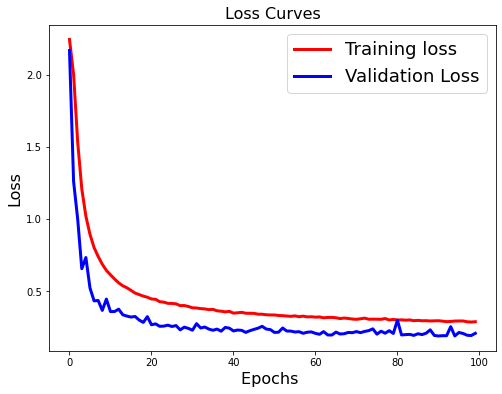

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

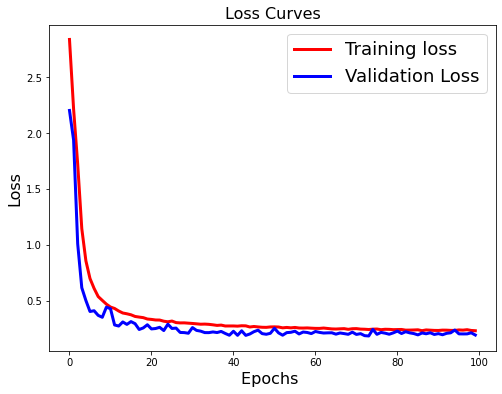

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

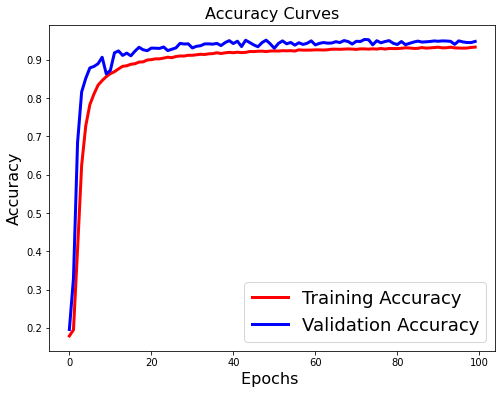

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# **Save model**

In [0]:
model2.save('/content/drive/My Drive/Colab Notebooks/A_Q3/model2.h5')